# Prompting strategy for the ORD-R dataset

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('ord_r_metrics.csv')
df.head()

,provider,engine,sampler,n_for_train,seed,dataset,accuracy,precision,recall,f1
0,anthropic,claude-3-haiku-20240307,random,4,36,data/ORD_R_text.csv,0.51,0.493151,0.7500,0.595041
1,anthropic,claude-3-haiku-20240307,random,4,42,data/ORD_R_text.csv,0.50,0.489130,0.9375,0.642857
2,anthropic,claude-3-haiku-20240307,random,4,84,data/ORD_R_text.csv,0.59,0.600000,0.4375,0.506024
3,anthropic,claude-3-haiku-20240307,random,4,200,data/ORD_R_text.csv,0.50,0.482143,0.5625,0.519231
4,anthropic,claude-3-haiku-20240307,random,4,12345,data/ORD_R_text.csv,0.54,0.521739,0.5000,0.510638


In [3]:
df.drop(columns=['provider', 'sampler', 'seed', 'dataset', 'precision', 'recall'], inplace=True)

In [4]:
df_mean = df.groupby(by=['engine', 'n_for_train']).mean().reset_index().rename(columns={'accuracy': 'accuracy_mean', 'f1': 'f1_mean'})
df_std = df.groupby(by=['engine', 'n_for_train']).std().reset_index().rename(columns={'accuracy': 'accuracy_std', 'f1': 'f1_std'})
df_all = df_mean.merge(df_std, on=['engine', 'n_for_train'])
df_all

,engine,n_for_train,accuracy_mean,f1_mean,accuracy_std,f1_std
0,claude-3-haiku-20240307,4,0.528,0.554758,0.038341,0.061172
1,claude-3-haiku-20240307,6,0.502,0.572402,0.026833,0.036206
2,claude-3-haiku-20240307,8,0.542,0.589358,0.055408,0.077058
3,mistral-large-latest,4,0.524,0.453690,0.047749,0.063734
4,mistral-large-latest,6,0.544,0.449829,0.027019,0.068486
5,mistral-large-latest,8,0.530,0.462692,0.040000,0.142792
6,mistral-small-latest,4,0.512,0.501487,0.025884,0.056742
7,mistral-small-latest,6,0.532,0.460380,0.043243,0.030902
8,mistral-small-latest,8,0.518,0.472787,0.027749,0.075809


In [5]:
c3h_a = df_all[df_all.engine=='claude-3-haiku-20240307'].accuracy_mean
c3h_a_err = df_all[df_all.engine=='claude-3-haiku-20240307'].accuracy_std

ms_a = df_all[df_all.engine=='mistral-small-latest'].accuracy_mean
ms_a_err = df_all[df_all.engine=='mistral-small-latest'].accuracy_std

ml_a = df_all[df_all.engine=='mistral-large-latest'].accuracy_mean
ml_a_err = df_all[df_all.engine=='mistral-large-latest'].accuracy_std

c3h_f1 = df_all[df_all.engine=='claude-3-haiku-20240307'].f1_mean
c3h_f1_err = df_all[df_all.engine=='claude-3-haiku-20240307'].f1_std

ml_f1 = df_all[df_all.engine=='mistral-large-latest'].f1_mean
ml_f1_err = df_all[df_all.engine=='mistral-large-latest'].f1_std

ms_f1 = df_all[df_all.engine=='mistral-small-latest'].f1_mean
ms_f1_err = df_all[df_all.engine=='mistral-small-latest'].f1_std

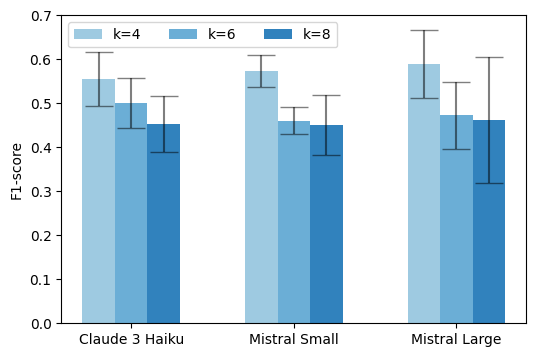

In [6]:
fig, ax = plt.subplots(figsize=(6, 4))
width = 0.4
fake_llm = np.array([4, 6, 8])

plt.bar(fake_llm-width, c3h_f1, width, label='k=4', color='#9ecae1')
ax.errorbar(fake_llm-width, c3h_f1, yerr=c3h_f1_err, alpha=0.5, ecolor='black', capsize=10, linestyle='none')

plt.bar(fake_llm, ms_f1, width, label='k=6', color='#6baed6')
ax.errorbar(fake_llm, ms_f1, yerr=ms_f1_err, alpha=0.5, ecolor='black', capsize=10, linestyle='none')

plt.bar(fake_llm+width, ml_f1, width, label='k=8', color='#3182bd')
ax.errorbar(fake_llm+width, ml_f1, yerr=ml_f1_err, alpha=0.5, ecolor='black', capsize=10, linestyle='none')

plt.xticks(fake_llm, ['Claude 3 Haiku', 'Mistral Small', 'Mistral Large'])
plt.ylabel("F1-score")
plt.legend(loc='upper left', ncol=3)
plt.ylim(0, 0.7)

#plt.savefig('ord_r_f1.jpg', format='jpg', dpi=700, bbox_inches='tight')
plt.show()

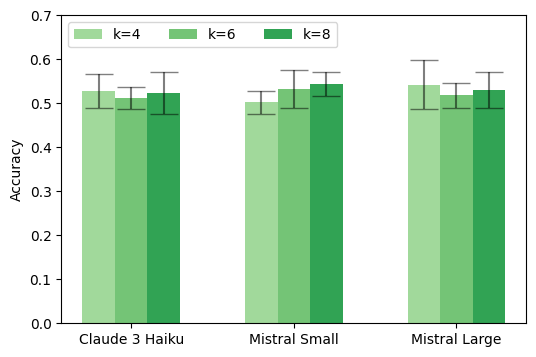

In [7]:
fig, ax = plt.subplots(figsize=(6, 4))
width = 0.4
fake_llm = np.array([4, 6, 8])

plt.bar(fake_llm-width, c3h_a, width, label='k=4', color='#a1d99b')
ax.errorbar(fake_llm-width, c3h_a, yerr=c3h_a_err, alpha=0.5, ecolor='black', capsize=10, linestyle='none')

plt.bar(fake_llm, ms_a, width, label='k=6', color='#74c476')
ax.errorbar(fake_llm, ms_a, yerr=ms_a_err, alpha=0.5, ecolor='black', capsize=10, linestyle='none')

plt.bar(fake_llm+width, ml_a, width, label='k=8', color='#31a354')
ax.errorbar(fake_llm+width, ml_a, yerr=ml_a_err, alpha=0.5, ecolor='black', capsize=10, linestyle='none')

plt.xticks(fake_llm, ['Claude 3 Haiku', 'Mistral Small', 'Mistral Large'])
plt.ylabel("Accuracy")
plt.legend(loc='upper left', ncol=3)
plt.ylim(0, 0.7)

#plt.savefig('ord_r_acc.jpg', format='jpg', dpi=700, bbox_inches='tight')
plt.show()